## early stopping -> keras will automatically stop training based on a loss condition on the validation data passed during the fitting process 

## dropout layers -> layers are set to turn off nurons. To prevent over fitting..the drop out layer will drop a predefined user percentage of neurons units in the previous layer of each batch

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## measurments of tumors data

In [4]:
from sklearn.datasets import load_breast_cancer

In [6]:
cancer = load_breast_cancer()

In [8]:
cancer_data = pd.DataFrame(cancer["data"], columns=cancer["feature_names"])

In [10]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
cancer_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [13]:
cancer_data["target"] = cancer["target"]

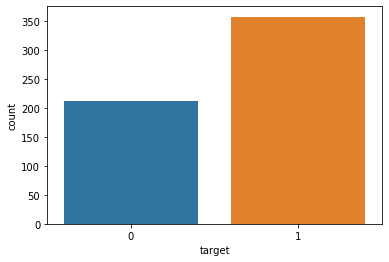

In [15]:
sns.countplot(x = "target", data=cancer_data)

## correlation between the features 

In [16]:
cancer_data.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


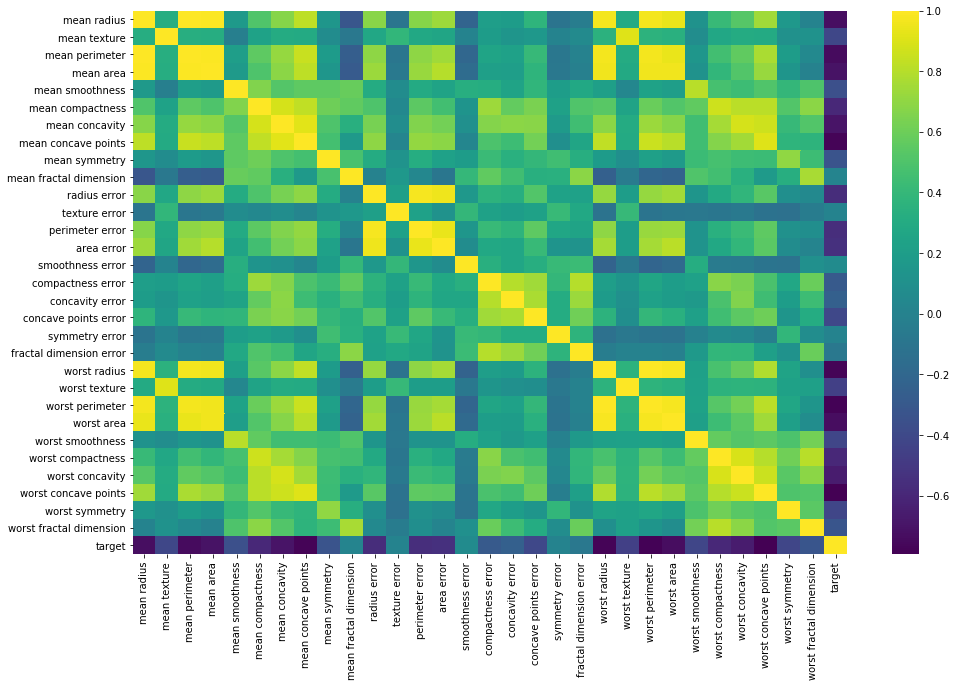

In [19]:
plt.figure(figsize=(16,10))
sns.heatmap(cancer_data.corr(), cmap="viridis")

## Corr to target

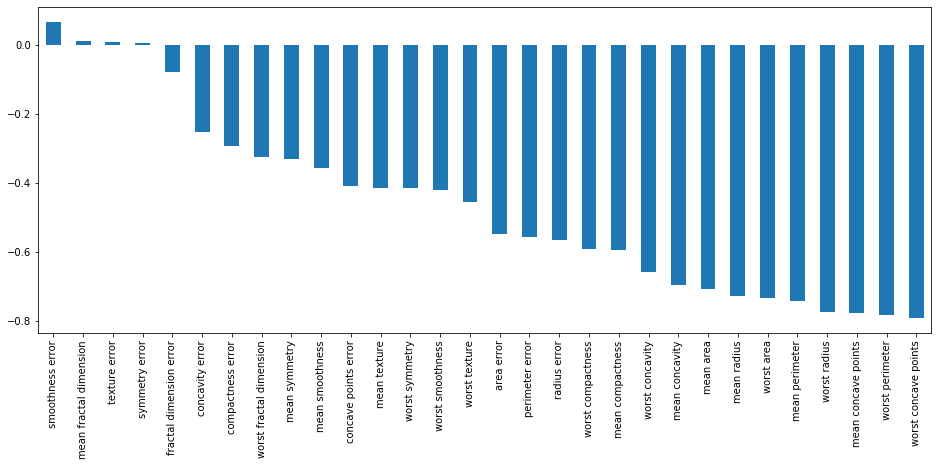

In [27]:
cancer_data.corr()["target"][:-1].sort_values(ascending = False).plot(kind= "bar", figsize = (16,6))

### preping the data for training

In [44]:
X = cancer_data.drop("target", axis=1).values
y = cancer_data["target"].values

## train test split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

### Scale data

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scalar = MinMaxScaler()

In [49]:
X_train =scalar.fit_transform(X_train)

In [50]:
X_test = scalar.transform(X_test)

### Creating the model and preventing overfitting

In [51]:
from tensorflow.keras.models import Sequential

In [52]:
from tensorflow.keras.layers import Dense, Dropout

## Model

In [53]:
X_train.shape

(426, 30)

In [54]:
model = Sequential()
model.add(Dense(units = 30, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam")

## Fit Model

In [55]:
model.fit(X_train,y_train, epochs=600, validation_data=(X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/sample - loss: 0.6749 - val_loss: 0.6561
Epoch 2/600
426/426 [==============================] - 0s 223us/sample - loss: 0.6424 - val_loss: 0.6272
Epoch 3/600
426/426 [==============================] - 0s 223us/sample - loss: 0.6102 - val_loss: 0.5919
Epoch 4/600
426/426 [==============================] - 0s 224us/sample - loss: 0.5679 - val_loss: 0.5438
Epoch 5/600
426/426 [==============================] - 0s 222us/sample - loss: 0.5181 - val_loss: 0.4940
Epoch 6/600
426/426 [==============================] - 0s 221us/sample - loss: 0.4674 - val_loss: 0.4402
Epoch 7/600
426/426 [==============================] - 0s 224us/sample - loss: 0.4163 - val_loss: 0.3876
Epoch 8/600
426/426 [==============================] - 0s 227us/sample - loss: 0.3698 - val_loss: 0.3415
Epoch 9/600
426/426 [==============================] - 0s 216us/sample - loss: 0.3259 - val_loss: 0.2993
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 221us/sample - loss: 0.0527 - val_loss: 0.1296
Epoch 79/600
426/426 [==============================] - 0s 219us/sample - loss: 0.0538 - val_loss: 0.1230
Epoch 80/600
426/426 [==============================] - 0s 220us/sample - loss: 0.0509 - val_loss: 0.1316
Epoch 81/600
426/426 [==============================] - 0s 223us/sample - loss: 0.0504 - val_loss: 0.1212
Epoch 82/600
426/426 [==============================] - 0s 221us/sample - loss: 0.0530 - val_loss: 0.1279
Epoch 83/600
426/426 [==============================] - 0s 219us/sample - loss: 0.0507 - val_loss: 0.1251
Epoch 84/600
426/426 [==============================] - 0s 225us/sample - loss: 0.0514 - val_loss: 0.1331
Epoch 85/600
426/426 [==============================] - 0s 227us/sample - loss: 0.0503 - val_loss: 0.1260
Epoch 86/600
426/426 [==============================] - 0s 227us/sample - loss: 0.0495 - val_loss: 0.1264
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 220us/sample - loss: 0.0410 - val_loss: 0.1305
Epoch 156/600
426/426 [==============================] - 0s 219us/sample - loss: 0.0408 - val_loss: 0.1341
Epoch 157/600
426/426 [==============================] - 0s 214us/sample - loss: 0.0386 - val_loss: 0.1548
Epoch 158/600
426/426 [==============================] - 0s 213us/sample - loss: 0.0453 - val_loss: 0.1372
Epoch 159/600
426/426 [==============================] - 0s 216us/sample - loss: 0.0451 - val_loss: 0.1311
Epoch 160/600
426/426 [==============================] - 0s 219us/sample - loss: 0.0373 - val_loss: 0.1433
Epoch 161/600
426/426 [==============================] - 0s 224us/sample - loss: 0.0388 - val_loss: 0.1409
Epoch 162/600
426/426 [==============================] - 0s 214us/sample - loss: 0.0364 - val_loss: 0.1466
Epoch 163/600
426/426 [==============================] - 0s 216us/sample - loss: 0.0364 - val_loss: 0.1344
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 244us/sample - loss: 0.0206 - val_loss: 0.1568
Epoch 308/600
426/426 [==============================] - 0s 223us/sample - loss: 0.0197 - val_loss: 0.1602
Epoch 309/600
426/426 [==============================] - 0s 230us/sample - loss: 0.0194 - val_loss: 0.1670
Epoch 310/600
426/426 [==============================] - 0s 222us/sample - loss: 0.0226 - val_loss: 0.1820
Epoch 311/600
426/426 [==============================] - 0s 229us/sample - loss: 0.0240 - val_loss: 0.1470
Epoch 312/600
426/426 [==============================] - 0s 215us/sample - loss: 0.0250 - val_loss: 0.1766
Epoch 313/600
426/426 [==============================] - 0s 210us/sample - loss: 0.0228 - val_loss: 0.1718
Epoch 314/600
426/426 [==============================] - 0s 221us/sample - loss: 0.0204 - val_loss: 0.1659
Epoch 315/600
426/426 [==============================] - 0s 244us/sample - loss: 0.0214 - val_loss: 0.1597
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 211us/sample - loss: 0.0124 - val_loss: 0.1997
Epoch 460/600
426/426 [==============================] - 0s 214us/sample - loss: 0.0111 - val_loss: 0.1959
Epoch 461/600
426/426 [==============================] - 0s 212us/sample - loss: 0.0130 - val_loss: 0.2048
Epoch 462/600
426/426 [==============================] - 0s 210us/sample - loss: 0.0116 - val_loss: 0.1865
Epoch 463/600
426/426 [==============================] - 0s 222us/sample - loss: 0.0131 - val_loss: 0.2155
Epoch 464/600
426/426 [==============================] - 0s 210us/sample - loss: 0.0122 - val_loss: 0.1834
Epoch 465/600
426/426 [==============================] - 0s 211us/sample - loss: 0.0128 - val_loss: 0.2047
Epoch 466/600
426/426 [==============================] - 0s 220us/sample - loss: 0.0192 - val_loss: 0.1756
Epoch 467/600
426/426 [==============================] - 0s 210us/sample - loss: 0.0213 - val_loss: 0.1997
Epoch 468/600
426/426 [============================

### lets see out performance. Overfitting has occurred-> to training data set. Training for two many eopcs. So wewill need to do early stopping. Bases on validation loss

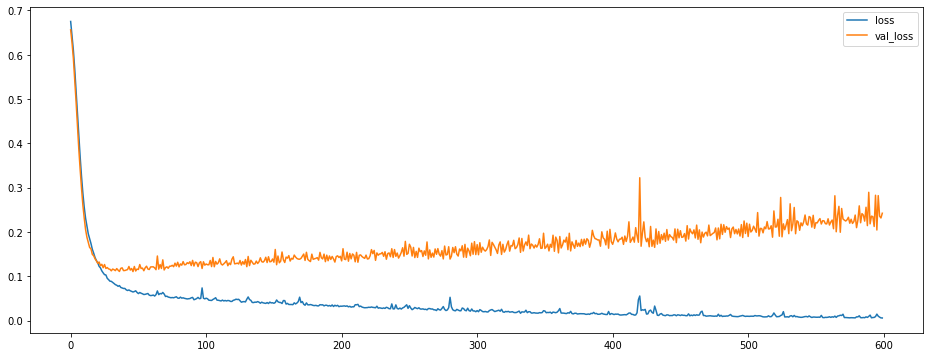

In [58]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

In [59]:
model = Sequential()
model.add(Dense(units = 30, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam")

### we will use callbacks to prevent the overftting of our data

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

## what we have to do is find a metric to monitor-> in our case Validation loss.. minumum changes -> patience -> number of epocs with no emprovments-> training will be stopped

## step 1

In [61]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)

## fit model with stop

In [62]:
model.fit(X_train,y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6526 - val_loss: 0.6261
Epoch 2/600
426/426 [==============================] - 0s 224us/sample - loss: 0.6030 - val_loss: 0.5759
Epoch 3/600
426/426 [==============================] - 0s 224us/sample - loss: 0.5514 - val_loss: 0.5267
Epoch 4/600
426/426 [==============================] - 0s 225us/sample - loss: 0.4985 - val_loss: 0.4716
Epoch 5/600
426/426 [==============================] - 0s 226us/sample - loss: 0.4471 - val_loss: 0.4143
Epoch 6/600
426/426 [==============================] - 0s 220us/sample - loss: 0.3900 - val_loss: 0.3626
Epoch 7/600
426/426 [==============================] - 0s 219us/sample - loss: 0.3453 - val_loss: 0.3168
Epoch 8/600
426/426 [==============================] - 0s 220us/sample - loss: 0.3029 - val_loss: 0.2789
Epoch 9/600
426/426 [==============================] - 0s 226us/sample - loss: 0.2731 - val_loss: 0.2494
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 227us/sample - loss: 0.0501 - val_loss: 0.0999
Epoch 79/600
426/426 [==============================] - 0s 223us/sample - loss: 0.0550 - val_loss: 0.1044
Epoch 80/600
426/426 [==============================] - 0s 228us/sample - loss: 0.0512 - val_loss: 0.0994
Epoch 81/600
426/426 [==============================] - 0s 230us/sample - loss: 0.0491 - val_loss: 0.1020
Epoch 82/600
426/426 [==============================] - 0s 231us/sample - loss: 0.0501 - val_loss: 0.1059
Epoch 83/600
426/426 [==============================] - 0s 230us/sample - loss: 0.0500 - val_loss: 0.1031
Epoch 84/600
426/426 [==============================] - 0s 225us/sample - loss: 0.0479 - val_loss: 0.1031
Epoch 85/600
426/426 [==============================] - 0s 230us/sample - loss: 0.0491 - val_loss: 0.1009
Epoch 86/600
426/426 [==============================] - 0s 227us/sample - loss: 0.0479 - val_loss: 0.1024
Epoch 87/600
426/426 [========================

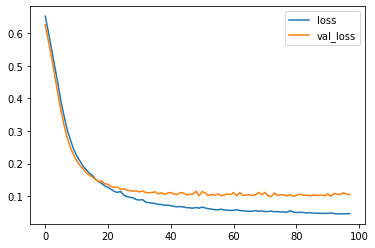

In [63]:
pd.DataFrame(model.history.history).plot()

#### Drop out layers -> turn off percentage of neirons randomly, normally between 0.2,0.5 -> essentially half of the neurones durig each batch will  randomlly be turned off for each epoch.

In [100]:
from tensorflow.keras.layers import Dropout

In [101]:
model = Sequential()
model.add(Dense(units = 30, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam")

## we will use the dropouts in combnation with early stop

In [102]:
model.fit(X_train,y_train, epochs=600, validation_data=(X_test, y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.7015 - val_loss: 0.6831
Epoch 2/600
426/426 [==============================] - 0s 244us/sample - loss: 0.6928 - val_loss: 0.6728
Epoch 3/600
426/426 [==============================] - 0s 246us/sample - loss: 0.6681 - val_loss: 0.6611
Epoch 4/600
426/426 [==============================] - 0s 257us/sample - loss: 0.6514 - val_loss: 0.6471
Epoch 5/600
426/426 [==============================] - 0s 257us/sample - loss: 0.6486 - val_loss: 0.6285
Epoch 6/600
426/426 [==============================] - 0s 249us/sample - loss: 0.6132 - val_loss: 0.6022
Epoch 7/600
426/426 [==============================] - 0s 254us/sample - loss: 0.6101 - val_loss: 0.5701
Epoch 8/600
426/426 [==============================] - 0s 259us/sample - loss: 0.5695 - val_loss: 0.5408
Epoch 9/600
426/426 [==============================] - 0s 251us/sample - loss: 0.5642 - val_loss: 0.5002
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 240us/sample - loss: 0.1067 - val_loss: 0.1092
Epoch 79/600
426/426 [==============================] - 0s 239us/sample - loss: 0.1260 - val_loss: 0.1014
Epoch 80/600
426/426 [==============================] - 0s 241us/sample - loss: 0.1192 - val_loss: 0.1066
Epoch 81/600
426/426 [==============================] - 0s 247us/sample - loss: 0.1099 - val_loss: 0.0999
Epoch 82/600
426/426 [==============================] - 0s 261us/sample - loss: 0.1201 - val_loss: 0.1112
Epoch 83/600
426/426 [==============================] - 0s 241us/sample - loss: 0.1043 - val_loss: 0.1027
Epoch 84/600
426/426 [==============================] - 0s 242us/sample - loss: 0.1085 - val_loss: 0.1155
Epoch 85/600
426/426 [==============================] - 0s 241us/sample - loss: 0.1189 - val_loss: 0.0979
Epoch 86/600
426/426 [==============================] - 0s 233us/sample - loss: 0.1152 - val_loss: 0.0993
Epoch 87/600
426/426 [========================

### Overeview -> Great improvment  inthe performance -> both are dropping significantly and they flattening out at the same rate

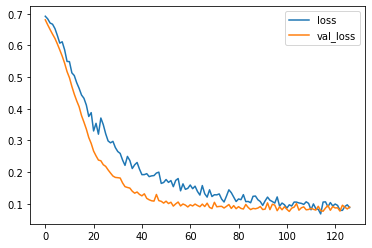

In [69]:
pd.DataFrame(model.history.history).plot()

### lets test on out model for precitions using Keras

In [71]:
predictions = model.predict_classes(X_test)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [82]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 3 85]]


In [94]:
new_cancer_cell = cancer_data.drop("target", axis=1).loc[568]

In [95]:
len(new_cancer_cell.values)

30

In [96]:
new_cancer_cell.values.reshape(-1,30)

array([[7.760e+00, 2.454e+01, 4.792e+01, 1.810e+02, 5.263e-02, 4.362e-02,
        0.000e+00, 0.000e+00, 1.587e-01, 5.884e-02, 3.857e-01, 1.428e+00,
        2.548e+00, 1.915e+01, 7.189e-03, 4.660e-03, 0.000e+00, 0.000e+00,
        2.676e-02, 2.783e-03, 9.456e+00, 3.037e+01, 5.916e+01, 2.686e+02,
        8.996e-02, 6.444e-02, 0.000e+00, 0.000e+00, 2.871e-01, 7.039e-02]])

In [97]:
single_house = scalar.transform(new_cancer_cell.values.reshape(-1,30))

In [98]:
model.predict(single_house)

array([[0.9944548]], dtype=float32)

In [99]:
cancer_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
